<a href="https://colab.research.google.com/github/yuliyagk/MLZoomcamp/blob/main/Logistical_Regression_MLBootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#1. Download the data and look at the data. 
url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv"
df_housing = pd.read_csv(url)
df_housing.describe

<bound method NDFrame.describe of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population

In [3]:
#2.Look at the first rows
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
#select only the columns, that we want to use

df_housingnew=df_housing[['latitude','longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value','ocean_proximity']].copy() 
df_housingnew.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
#look if we have the missing dates
df_housingnew.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

we have 207 missing values from 'total_bedrooms' variable

In [6]:
# looking if there are duplicate rows
(df_housingnew.shape[0]) - (df_housingnew.drop_duplicates().shape[0])

0

There aren`t any dublicates

In [7]:

df_housingnew['total_bedrooms']=df_housingnew.total_bedrooms.fillna(0)

In [8]:
df_housingnew.isnull().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [9]:
df_housingnew['rooms_per_household'] = df_housingnew['total_rooms']/df_housingnew['households']


In [10]:
df_housingnew['rooms_per_household']

0        6.984127
1        6.238137
2        8.288136
3        5.817352
4        6.281853
           ...   
20635    5.045455
20636    6.114035
20637    5.205543
20638    5.329513
20639    5.254717
Name: rooms_per_household, Length: 20640, dtype: float64

In [11]:
df_housingnew['bedrooms_per_room'] = df_housingnew['total_bedrooms']/df_housingnew['total_rooms']
df_housingnew['bedrooms_per_room']

0        0.146591
1        0.155797
2        0.129516
3        0.184458
4        0.172096
           ...   
20635    0.224625
20636    0.215208
20637    0.215173
20638    0.219892
20639    0.221185
Name: bedrooms_per_room, Length: 20640, dtype: float64

In [12]:
df_housingnew['population_per_household'] = df_housingnew['population']/df_housingnew['households']
df_housingnew['population_per_household']

0        2.555556
1        2.109842
2        2.802260
3        2.547945
4        2.181467
           ...   
20635    2.560606
20636    3.122807
20637    2.325635
20638    2.123209
20639    2.616981
Name: population_per_household, Length: 20640, dtype: float64

In [13]:
df_housingnew.isna().sum()

latitude                    0
longitude                   0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
median_house_value          0
ocean_proximity             0
rooms_per_household         0
bedrooms_per_room           0
population_per_household    0
dtype: int64

In [14]:
df_housingnew.describe(include=['O'])

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


In [15]:
df_housingnew['ocean_proximity'].mode()

0    <1H OCEAN
dtype: object

In [16]:

df_housingnew_numeric = df_housingnew.copy()
df_housingnew_numeric = df_housingnew.drop(['latitude', 'longitude', 'median_house_value', 'ocean_proximity'], axis=1)
df_housingnew_numeric.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,2635.763081,532.476211,1425.476744,499.539680,3.870671,5.429000,0.210902,3.070655
std,12.585558,2181.615252,422.678333,1132.462122,382.329753,1.899822,2.474173,0.061473,10.386050
min,1.000000,2.000000,0.000000,3.000000,1.000000,0.499900,0.846154,0.000000,0.692308
25%,18.000000,1447.750000,292.000000,787.000000,280.000000,2.563400,4.440716,0.174539,2.429741
50%,29.000000,2127.000000,431.000000,1166.000000,409.000000,3.534800,5.229129,0.202626,2.818116
75%,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,6.052381,0.239273,3.282261
max,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,141.909091,1.000000,1243.333333


In [17]:
df_housingnew_numeric.corr()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
housing_median_age,1.000000,-0.361262,-0.317063,-0.296244,-0.302916,-0.119034,-0.153277,0.125396,0.013191
total_rooms,-0.361262,1.000000,0.920196,0.857126,0.918484,0.198050,0.133798,-0.174583,-0.024581
total_bedrooms,-0.317063,0.920196,1.000000,0.866266,0.966507,-0.007295,0.002717,0.122205,-0.028019
population,-0.296244,0.857126,0.866266,1.000000,0.907222,0.004834,-0.072213,0.031397,0.069863
households,-0.302916,0.918484,0.966507,0.907222,1.000000,0.013033,-0.080598,0.059818,-0.027309
median_income,-0.119034,0.198050,-0.007295,0.004834,0.013033,1.000000,0.326895,-0.573836,0.018766
rooms_per_household,-0.153277,0.133798,0.002717,-0.072213,-0.080598,0.326895,1.000000,-0.387465,-0.004852
bedrooms_per_room,0.125396,-0.174583,0.122205,0.031397,0.059818,-0.573836,-0.387465,1.000000,0.003047
population_per_household,0.013191,-0.024581,-0.028019,0.069863,-0.027309,0.018766,-0.004852,0.003047,1.000000


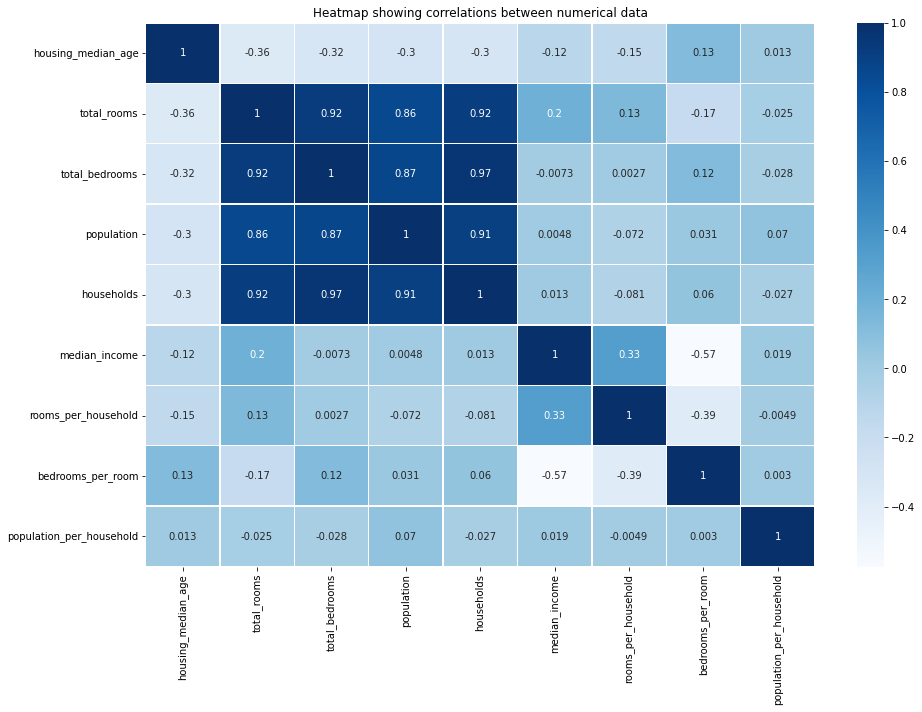

In [18]:
plt.figure(figsize=(15,10))  
sns.heatmap(df_housingnew_numeric.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

In [19]:
df_housingnew_numeric.corr().unstack().sort_values(ascending = False).head(15)

housing_median_age        housing_median_age          1.000000
total_rooms               total_rooms                 1.000000
bedrooms_per_room         bedrooms_per_room           1.000000
rooms_per_household       rooms_per_household         1.000000
median_income             median_income               1.000000
population                population                  1.000000
total_bedrooms            total_bedrooms              1.000000
households                households                  1.000000
population_per_household  population_per_household    1.000000
households                total_bedrooms              0.966507
total_bedrooms            households                  0.966507
                          total_rooms                 0.920196
total_rooms               total_bedrooms              0.920196
households                total_rooms                 0.918484
total_rooms               households                  0.918484
dtype: float64

In [20]:
df_housingnew_class = df_housingnew.copy()
mean = df_housingnew_class['median_house_value'].mean()

df_housingnew_class['above_average'] = np.where(df_housingnew_class['median_house_value']>=mean,1,0)

In [21]:
df_housingnew_class = df_housingnew_class.drop('median_house_value', axis=1)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
df_train_full, df_test = train_test_split(df_housingnew_class, test_size=0.2, random_state=42)

In [24]:
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [25]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [26]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

Mutual information

In [27]:
from sklearn.metrics import mutual_info_score

In [28]:
cat = ['ocean_proximity']

In [29]:
def calculate_mi(series):
    return mutual_info_score(series, df_train.above_average)

df_mi = df_train[cat].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')

In [30]:
round(df_mi,2)

,MI
ocean_proximity,0.1


In [31]:
df_train = df_train.drop('above_average', axis=1)
df_val = df_val.drop('above_average', axis=1)
df_test = df_test.drop('above_average', axis=1)

Classification and accuracy of a model

In [32]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [37]:
num = ['latitude','longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','rooms_per_household','bedrooms_per_room','population_per_household']

In [38]:
train_dict = df_train[cat + num].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

In [39]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

val_dict = df_val[cat + num].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict(X_val)

accuracy = np.round(accuracy_score(y_val, y_pred),2)
print(accuracy)

0.84


In [40]:
features = cat + num
features

['ocean_proximity',
 'latitude',
 'longitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household']

Feature elimination

In [41]:
orig_score = accuracy


for c in features:
    subset = features.copy()
    subset.remove(c)
    
    train_dict = df_train[subset].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)

    model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    score = accuracy_score(y_val, y_pred)
    print(c, orig_score - score, score)

ocean_proximity 0.04106589147286821 0.7989341085271318
latitude 0.017810077519379797 0.8221899224806202
longitude 0.019021317829457374 0.8209786821705426
housing_median_age 0.04397286821705426 0.7960271317829457
total_rooms 0.01320736434108527 0.8267926356589147
total_bedrooms 0.014176356589147288 0.8258236434108527
population 0.03331395348837207 0.8066860465116279
households 0.010300387596899219 0.8296996124031008
median_income 0.08660852713178291 0.7533914728682171
rooms_per_household 0.032344961240310055 0.8076550387596899
bedrooms_per_room 0.03840116279069761 0.8015988372093024
population_per_household 0.0379166666666666 0.8020833333333334


Answer for Question 5: smallest difference - 'households'

In [42]:
df_housingnew['median_house_value']=np.log1p(df_housingnew['median_house_value'])

In [43]:
df_train_full, df_test = train_test_split(df_housingnew, test_size=0.2, random_state=42)

In [44]:
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [45]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [46]:
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

In [47]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

Ridge Regression

In [48]:
train_dict = df_train[cat + num].to_dict(orient='records')

In [49]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

val_dict = df_val[cat + num].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [50]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [51]:
for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a,solver="sag",random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    print(a, round(score, 3))

0 0.524
0.01 0.524
0.1 0.524
1 0.524
10 0.524
